<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 3</center></h1>

- Nome completo: <Vinicius Gonçalves Paraizo Borges>
- [Link para vídeo](<https://youtu.be/GjhXjibgIuA>)

# (1) Correlação e covariância


Você é analista de dados de uma empresa de educação. Foram coletadas informações
sobre os seguintes atributos de alunos de um curso online:

- horas_estudo: número de horas que o aluno estudou na semana;
- nota_final: nota final no curso (0 a 100).

Seu objetivo é investigar a relação entre essas duas variáveis.

1. Cálculo Manual
    - Calcule a média de cada variável;
    - Calcule a covariância amostral:
        - $Cov(X,Y) = \frac{1}{n-1}*\sum_{i=1}^n (X_{i} - \bar{X})(Y_{i} - \bar{Y})$
    - Calcule a correlação de Pearson:
        - $\rho(X,Y) = \frac{Cov(X,Y)}{S_{X}S_{Y}}$

Use as funções np.mean(), np.std() e np.cov() para comparar seus resultados.

In [124]:
import numpy as np
import pandas as pd

np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5,
30)
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

# Código disponibilizado no enunciado da questão

In [125]:
df.iloc[:5]

,Horas de Estudo,Nota Final
0,10.993428,90.965180
1,9.723471,98.155277
2,11.295377,95.114022
3,13.046060,96.895684
4,9.531693,92.239498


In [126]:
# calcular a média das variáveis:

x_bar = df['Horas de Estudo '].mean()
y_bar = df['Nota Final '].mean()

print(x_bar)
print(y_bar)

9.623706208297927
87.88901248174199


In [127]:
df.iloc[0][df.columns[0]]

10.993428306022466

In [128]:
def covariance(x_bar,y_bar,df):
    desvios = []
    n = len(df)
    for i in range(n):
        x_i = df.iloc[i][df.columns[0]]
        y_i = df.iloc[i][df.columns[1]]
        desvio_x = x_i - x_bar
        desvio_y = y_i - y_bar
        desvios.append(desvio_x * desvio_y)
    
    sum = np.sum(desvios)
    cov = (1/(n-1))*sum
    return cov

In [129]:
cov = covariance(x_bar,y_bar,df)

print(cov)

# Covariancia positiva !

13.788410270749694


In [130]:
covariance = np.cov(df['Horas de Estudo '], df['Nota Final '])
print(covariance) # resultado igual !

[[ 3.24004628 13.78841027]
 [13.78841027 80.1403243 ]]


In [133]:
# Coeficiente de pearson:
# r = cov(x, y) / (σx * σy)

def pearson_coeff(cov,s1,s2):
    return cov / (s1*s2)

s1 = df['Horas de Estudo '].std()
s2 = df['Nota Final '].std()

p = pearson_coeff(cov,s1,s2)

p

0.8556832738480706

In [134]:
pearson_coef = np.corrcoef(df['Horas de Estudo '], df['Nota Final '])[0, 1]

pearson_coef # Resultado igual !

0.8556832738480707

2. Visualização
    - Crie um gráfico de dispersão entre horas_estudo e nota_final;
    - Adicione uma linha de tendência linear;
    - Interprete o resultado: a relação é positiva, negativa ou nula?

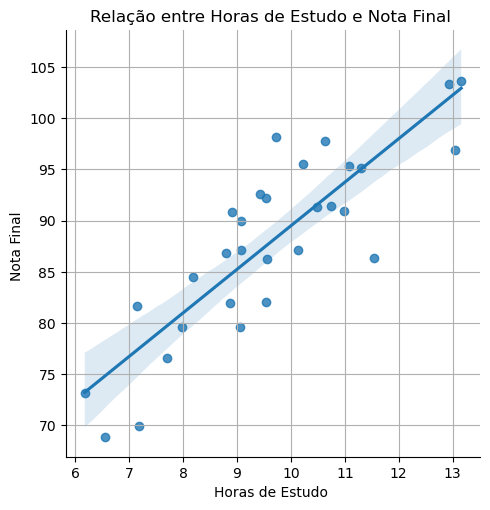

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo ', y='Nota Final ', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final ')
plt.grid(True)
plt.show()

# Relação positiva: quando uma variável cresce, a outra cresce também.

3. Interpretação
    - O valor da correlação está mais próximo de 0, +1 ou –1? O que isso indica?
    - A covariância obtida é positiva ou negativa? O que isso significa no contexto?
    - Se a unidade da nota fosse alterada (ex: de 0–100 para 0–10), o valor da
correlação mudaria? E a covariância?

In [ ]:
# O valor da correlação está mais próximo de +1 do que de 0 (sem correlação) e muito menos de -1 (correlação negativa)
# Podemos ver isso através da matriz de correlação (covariância normalizada) - igual ao coef de pearson.

print(df[['Horas de Estudo ', 'Nota Final ']].corr(),'\n\n')

# Corriância obtida é positiva. Isso significa que se uma variável aumenta, a outra tem tendência em aumentar também.

# A unidade sendo alterada, o valor da covariância altera, pois a escala muda:
df['Nota Final - /10'] = df['Nota Final ']/10

cov_alt = np.cov(df['Horas de Estudo '], df['Nota Final - /10'])
print(f"cov: {cov}")
print(f"cov alt: {cov_alt[0][0]}\n\n")

# Porém, a correlação não mudaria, pois se trata da covariância normalizada (entre -1 e 1). Os desvios padrões se ajustam.
print(df[['Horas de Estudo ', 'Nota Final - /10']].corr())


                  Horas de Estudo   Nota Final 
Horas de Estudo           1.000000     0.855683
Nota Final                0.855683     1.000000 


cov: 13.788410270749694
cov alt: 3.240046277462607


                  Horas de Estudo   Nota Final - /10
Horas de Estudo           1.000000          0.855683
Nota Final - /10          0.855683          1.000000


4. Outras simulações
    - Gere um novo conjunto de dados em que a correlação entre horas_estudo
e nota_final seja próxima de zero;
    - Gere um conjunto com correlação negativa entre as variáveis.

In [137]:
# Conjunto em que correlação entre 'horas estudo' e 'nota final' seja próxima de zero
np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = np.random.uniform(0, 100, 30) # numeros aleatórios entre 0 a 100
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

df.corr()

,Horas de Estudo,Nota Final
Horas de Estudo,1.000000,-0.118644
Nota Final,-0.118644,1.000000


In [138]:
# Conjunto em que correlação entre 'horas estudo' e 'nota final' seja negativa
np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = 80 - np.random.normal(30, 10, 30) * horas_estudo 
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

df.corr()

,Horas de Estudo,Nota Final
Horas de Estudo,1.0000,-0.5248
Nota Final,-0.5248,1.0000


# (2) Regressão Linear Múltipla

Considere o conjunto de dados Auto1. O arquivo Auto.csv contém os dados para
essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

(i) Produza uma matriz de gráfico de dispersão que inclua todas as variáveis
no conjunto de dados.

In [ ]:
#!pip install ISLP

In [139]:
from ISLP import load_data
import seaborn as sns

Auto = load_data('Auto')

In [140]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

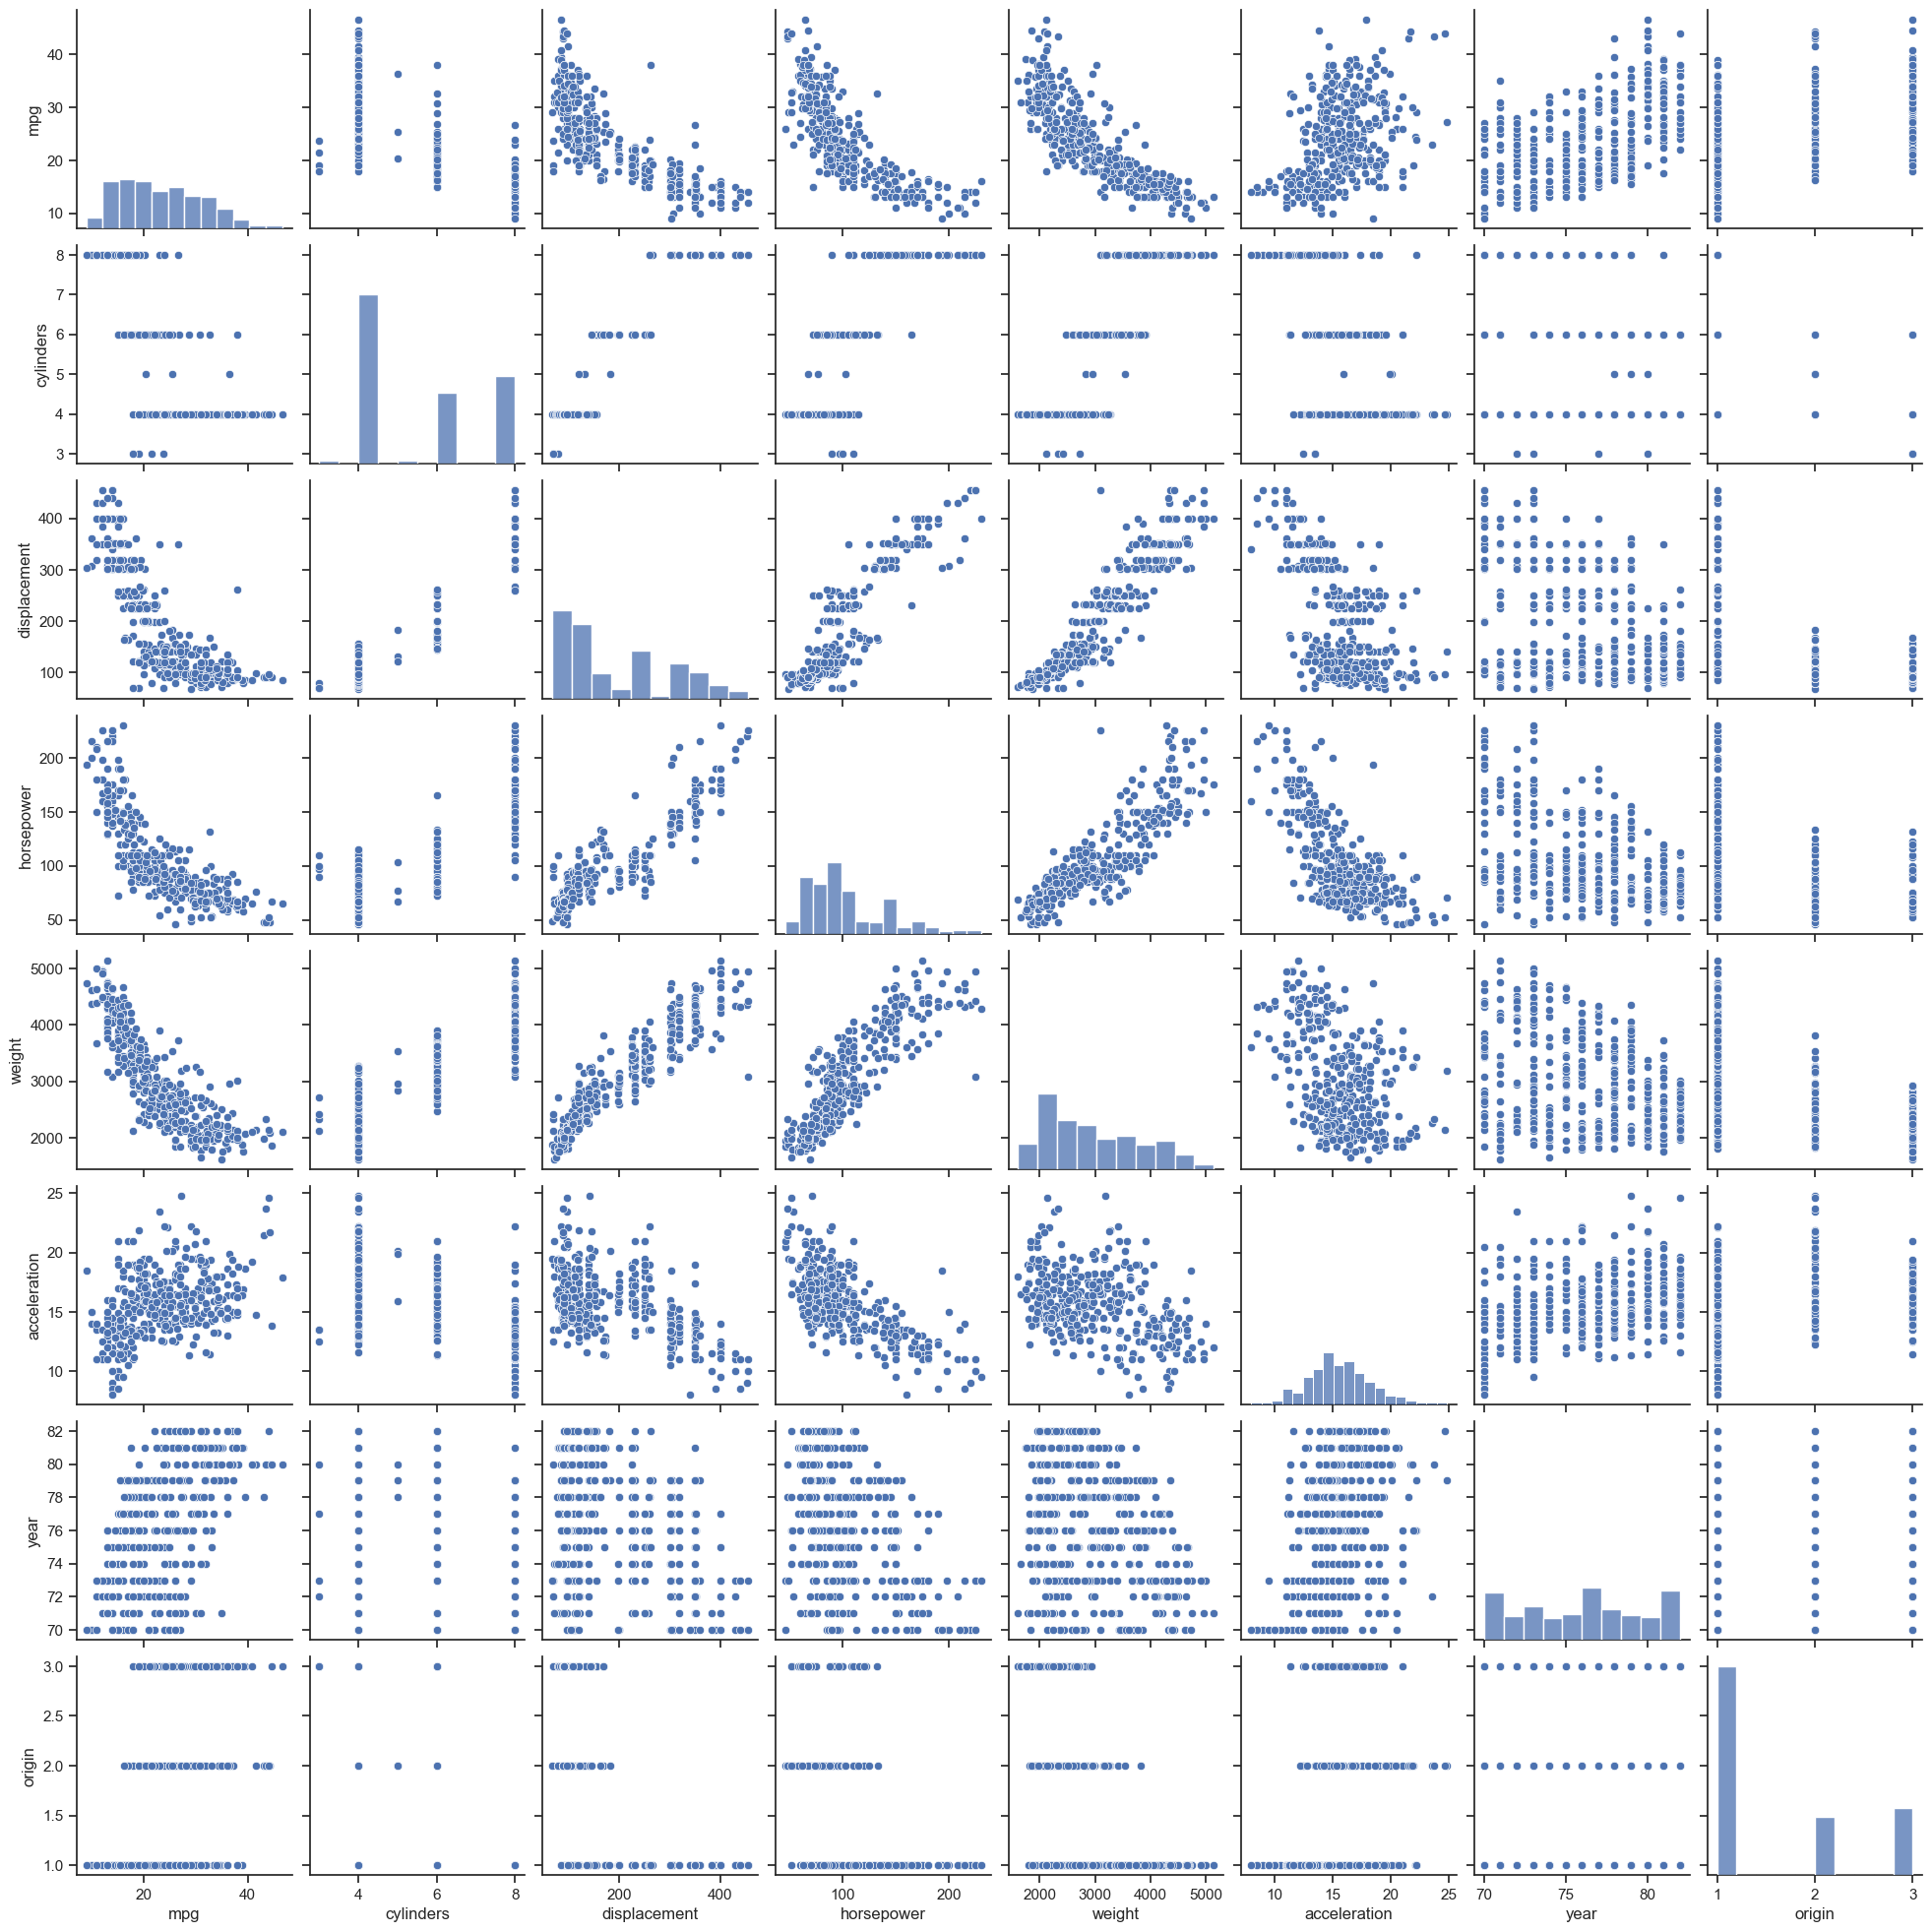

In [141]:
sns.set_theme(style="ticks")

sns.pairplot(Auto)

(ii) Calcule a matriz de correlações entre as variáveis usando a função corr()
do pandas.DataFrame. Você precisará excluir a variável name, que é qualitativa.

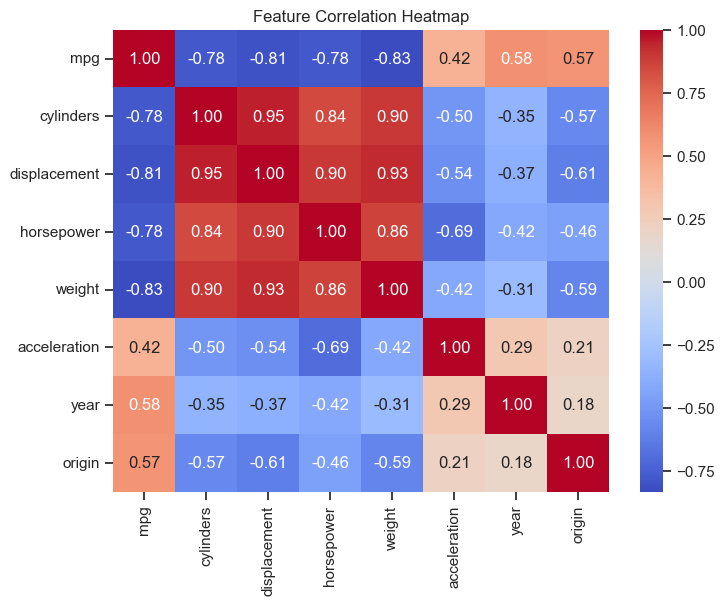

In [142]:
plt.figure(figsize=(8, 6))
sns.heatmap(Auto.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

(iii) Use a função ols() da biblioteca statsmodels para realizar uma regressão
linear múltipla com mpg como resposta e todas as outras variáveis (exceto
nome) como os preditores. Use a função summary() para imprimir os resultados.
Comente sobre a saída.


In [ ]:
!python -m pip install statsmodels

In [143]:
import statsmodels.api as sm

# A reta OLS é aquela que minimiza a distância vertical ao quadrado entre os pontos observados e a reta.

Auto_sem_mpg = Auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]

# Defina as variáveis independentes (X) e a variável dependente (Y)
X = sm.add_constant(Auto_sem_mpg)
Y = Auto['mpg']
modelo = sm.OLS(Y, X)
resultado = modelo.fit()

# Resultados
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        15:00:41   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

* Existe uma relação entre os preditores e a resposta?
    * Sim. A regressão mostra um $`R^2`$ score de 0.821, o que significa que 82,1% da variabilidade do consumo de combustível (mpg) é explicada pelos preditores usados no modelo. Isso indica uma forte relação global entre os preditores (features) e a variável dependente 'MPG'.


* Quais preditores parecem ter um valor estatisticamente significativo
com relação à resposta (p < 0.05)?
    * displacement (p = 0.008)
    * weight (p ≈ 0.000)
    * year (p ≈ 0.000)
    * origin (p ≈ 0.000)

* O que sugere o coeficiente correspondente à variável ano?
    * Como 'Year' possui um valor estatisticamente significativo com relação à resposta, o seu valor influenciará mais na resposta. Logo, a cada aumento de 1 ano no modelo do carro está associado, em média, a um aumento de 0.75 milhas por galão (mpg), mantendo todas as outras variáveis constantes. Isso sugere que os carros mais novos tendem a ser mais eficientes em termos de Miles per Galon.

(iv) Use a função regplot da biblioteca seaborn para produzir gráficos de diagnóstico
do ajuste de regressão linear. Comente sobre quaisquer problemas
que você encontrar com o ajuste.

In [144]:
pred = resultado.predict(X)

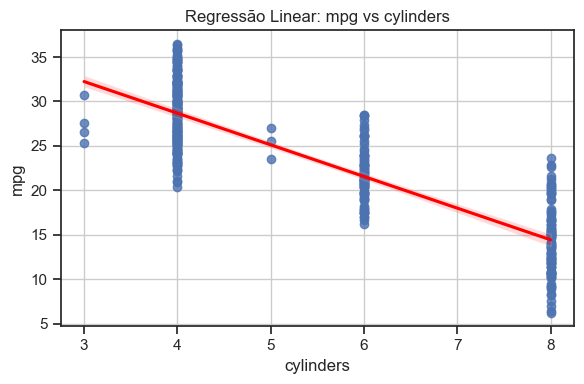

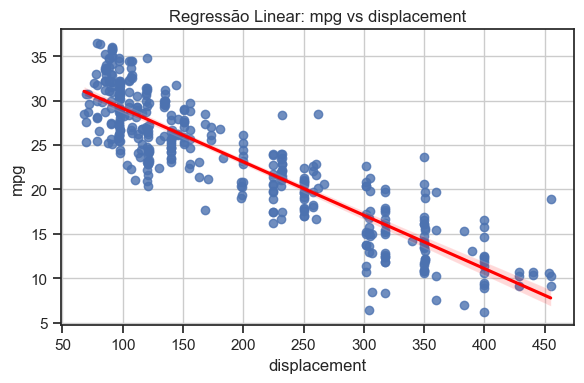

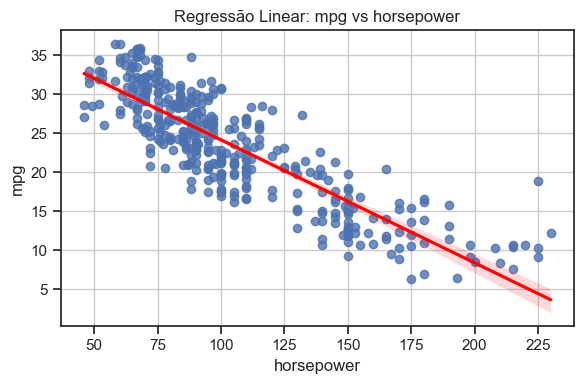

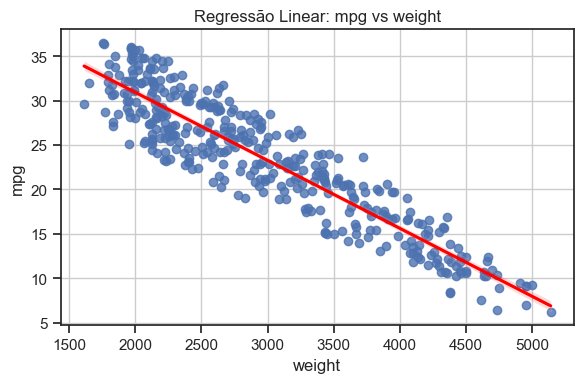

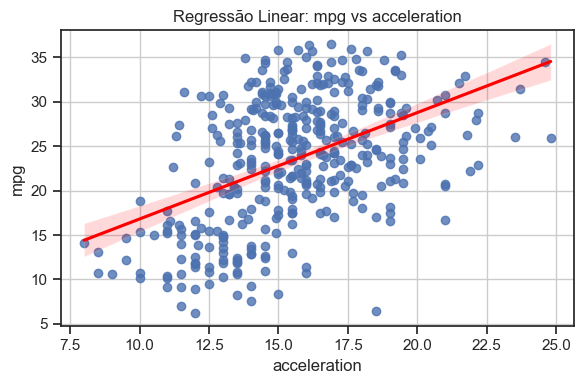

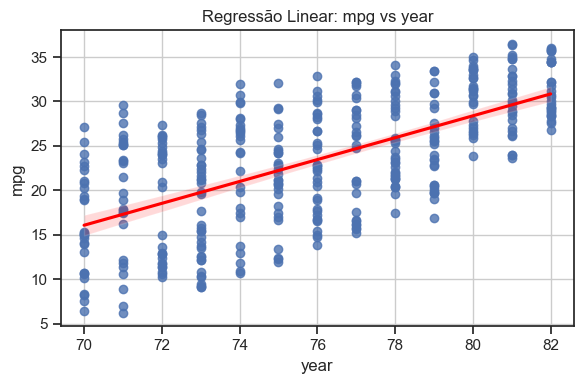

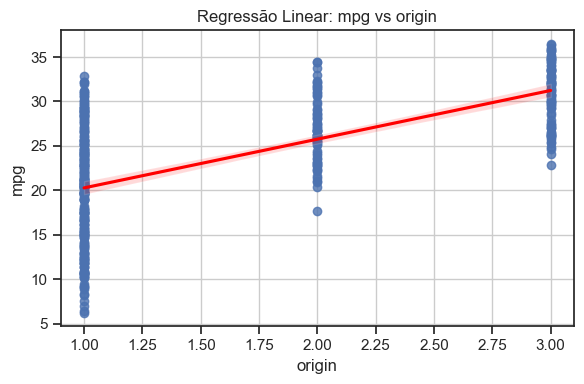

In [145]:


variaveis = ['cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'year', 'origin']

# Cria gráficos regplot para cada variável preditora
for var in variaveis:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=Auto[var], y=pred, line_kws={"color": "red"})
    plt.title(f"Regressão Linear: mpg vs {var}")
    plt.xlabel(var)
    plt.ylabel('mpg')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

*Sua explicação aqui:*

Percebe-se, pelos gráficos gerados com regplot, que algumas variáveis apresentam alta dispersão dos pontos em torno da reta ajustada, como é o caso de acceleration. Isso indica uma fraca relação linear com a variável de resposta mpg, o que pode resultar em erros altos (distâncias verticais ao quadrado) no ajuste da regressão.

Além disso, variáveis como cylinders, origin e year possuem um número limitado de valores distintos no eixo x, formando faixas discretas de pontos. Isso ocorre porque essas variáveis são essencialmente categóricas ou discretas (por exemplo, origin representa a origem do carro e cylinders a quantidade de cilindros inteiros). Ao usar regressão linear com essas variáveis como se fossem contínuas, o modelo pode falhar em capturar variações importantes, pois ele tenta ajustar uma média contínua sobre valores que mudam em saltos.

---

# (3) DiD: Salário mínimo x taxa de empregos

Nesta parte, você irá replicar um estudo realizado originalmente por Card and
Krueger [1994] sobre o efeito do aumento do salário mínimo sobre a taxa
de empregos. A teoria econômica convencional sugere que num mercado de
trabalho com concorrência perfeita, um aumento no salário mínimo leva a um
aumento no desemprego. Em abril de 1992, o estado americano de Nova Jersey
(NJ) aumentou o salário mínimo (por hora) de US$ 4,25 para US$ 5,05. Card e
Krueger (1994) utilizaram a técnica Difference-in-Difference (DiD) e mostraram
que este aumento nos salários mínimos levou a um aumento no emprego no setor
dos restaurantes de fast food. O grupo de controle utilizado nesse estudo foi
o estado vizinho da Pensilvânia (PA), que não foi sujeito a essa mudança de
política. Os autores realizaram uma pesquisa antes e depois do aumento do
salário mínimo com uma amostra representativa de restaurantes de fast food
em NJ e PA. Esta configuração pode ser considerada quase experimental, uma
vez que ambos os estados não são idênticos em muitos aspectos e o processo
legislativo, para aumentar o salário mínimo, não foi iniciado ao acaso.
O arquivo card_krueger_1994_mod.csv contém os dados para essa parte do
trabalho. Esse arquivo está na plataforma MS Teams.


(i) Reproduza o gráfico apresentado na Figura 1 do estudo supra-mencionado.

In [146]:
import pandas as pd


url = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/card_krueger_1994_mod.csv'
df = pd.read_csv(url)

df.columns

Index(['Unnamed: 0', 'bonus', 'chain', 'co_owned', 'date', 'empft', 'emppt',
       'firstinc', 'hrsopen', 'inctime', 'meals', 'ncalls', 'nmgrs', 'nregs',
       'nregs11', 'observation', 'open', 'pctaff', 'pentree', 'pfry', 'psoda',
       'region', 'sheet', 'special', 'state', 'status', 'type', 'wage_st',
       'emptot', 'pct_fte'],
      dtype='object')

In [147]:
df_filtrado = df[['wage_st', 'state', 'date']].dropna()

df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

In [148]:
df_filtrado

,wage_st,state,date
410,4.30,Pennsylvania,1992-11-17
411,4.45,Pennsylvania,1992-11-12
412,5.00,Pennsylvania,1992-11-12
413,5.25,Pennsylvania,1992-11-14
414,4.75,Pennsylvania,1992-11-14
...,...,...,...
815,5.25,New Jersey,1992-11-14
816,5.25,New Jersey,1992-11-17
817,5.05,New Jersey,1992-11-11
818,5.05,New Jersey,1992-12-17


In [149]:
# Filtrar apenas os dados de novembro de 1992
df_nov_1992 = df_filtrado[df_filtrado['date'].dt.to_period('M') == '1992-11']


# e agora os de dezembro de 1992
df_dez_1992 = df_filtrado[df_filtrado['date'].dt.to_period('M') == '1992-12']

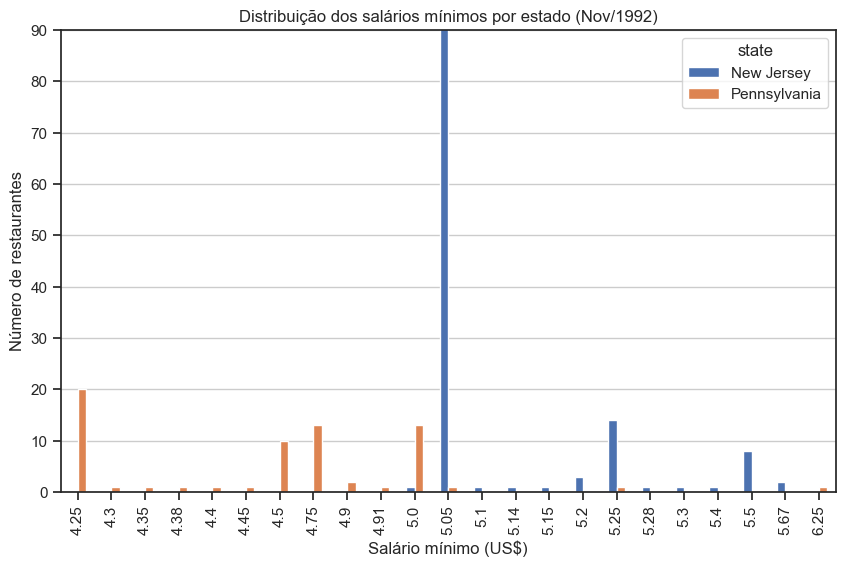

In [150]:
import matplotlib.pyplot as plt

salarios = pd.crosstab(df_nov_1992['state'], df_nov_1992['wage_st']).T

salarios.plot.bar(figsize=(10, 6))
plt.title('Distribuição dos salários mínimos por estado (Nov/1992)')
plt.xlabel('Salário mínimo (US$)')
plt.ylabel('Número de restaurantes')
plt.ylim(0, 90)
plt.grid(axis='y')
plt.show()

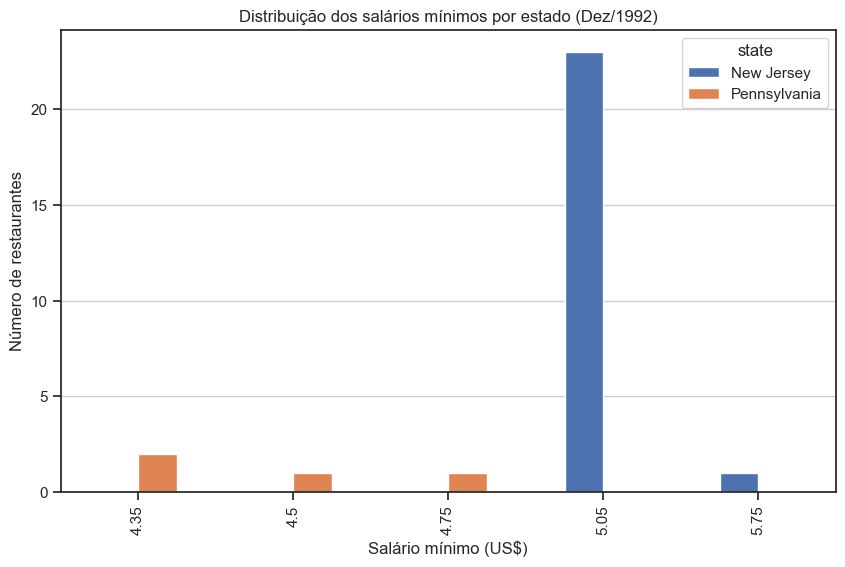

In [151]:
salarios = pd.crosstab(df_dez_1992['state'], df_dez_1992['wage_st']).T

salarios.plot.bar(figsize=(10, 6))
plt.title('Distribuição dos salários mínimos por estado (Dez/1992)')
plt.xlabel('Salário mínimo (US$)')
plt.ylabel('Número de restaurantes')
plt.grid(axis='y')
plt.show()

(ii) Calcule a estimativa DiD usando a abordagem de computar a diferença
das médias. Ou seja, neste item você não deve usar a statsmodels para
realizar a regressão. Use apenas Python (ou R) para computar as médias
da variável de interesse para os dois grupos, antes e depois da intervenção.


$ DiD = (\bar{Y}_{NJ, pós} - \bar{Y}_{NJ, pré}) - (\bar{Y}_{PA, pós} - \bar{Y}_{PA, pré}) $

In [152]:
df_filtrado['post'] = (df_filtrado['date'].dt.strftime('%Y-%m') == '1992-12').astype(int)

In [153]:
# Médias por grupo
mean_nj_post = df_filtrado[(df_filtrado['state'] == 'New Jersey') & (df_filtrado['post'] == 1)]['wage_st'].mean()
mean_nj_pre  = df_filtrado[(df_filtrado['state'] == 'New Jersey') & (df_filtrado['post'] == 0)]['wage_st'].mean()
mean_pa_post = df_filtrado[(df_filtrado['state'] == 'Pennsylvania') & (df_filtrado['post'] == 1)]['wage_st'].mean()
mean_pa_pre  = df_filtrado[(df_filtrado['state'] == 'Pennsylvania') & (df_filtrado['post'] == 0)]['wage_st'].mean()

# Estimativa DiD
did = (mean_nj_post - mean_nj_pre) - (mean_pa_post - mean_pa_pre)

print("Estimativa DiD:", did) # O DiD retorna o EFEITO CAUSAL MÉDIO SOBRE A VARIÁVEL DE INTERESSE (SALÁRIO)

# retornou um valor > 0 

Estimativa DiD: 0.13590415270585954


(iii) Agora compute novamente a estimativa DiD, dessa vez utilizando a regressão
linear. Para isso, você deve inicialmente criar duas variáveis dummy.
Um indica o início do tratamento (tempo) e é igual a zero antes do tratamento
e igual a um após o tratamento. A outra variável separa as observações
em grupo de tratamento e grupo controle (tratado). Essa segunda
variável dummy é igual a um para restaurantes fast food localizados em NJ
e igual a zero para restaurantes fast food localizados no PA. Em seguida,
crie a variável de interação multiplicativa. Finalmente, use a biblioteca
statsmodels para gerar o modelo de regressão linear. Apresente sua análise
e interpretação do resultado obtido.

In [154]:
# β0: Baseline outcome for control group before treatment. 
# β1: Change over time for the control group (i.e., from before to after). 
# β2: Difference between groups before treatment. 
# β3: Difference-in-Differences (DiD) — the additional change in the treated group relative to the change in the control group.


# Mais fácil visualizar com os valores esperados:

# Treated	    Post	       Expected Value of 𝑌
# ​0 (Control)	 0 (Before)     𝛽0 ​ 
# 0 (Control)   1 (After)      𝛽0 + 𝛽1
# 1 (Treated)	0 (Before)     𝛽0 + 𝛽2
# 1 (Treated)	1 (After)      𝛽0 + 𝛽1 + 𝛽2 + 𝛽3

df_filtrado['treated'] = (df_filtrado['state'] == 'New Jersey').astype(int)
df_filtrado['interacao'] = df_filtrado['treated'] * df_filtrado['post'] # captura o efeito diferencial do tratamento (DiD)
print(df_filtrado)

     wage_st         state       date  post  treated  interacao
410     4.30  Pennsylvania 1992-11-17     0        0          0
411     4.45  Pennsylvania 1992-11-12     0        0          0
412     5.00  Pennsylvania 1992-11-12     0        0          0
413     5.25  Pennsylvania 1992-11-14     0        0          0
414     4.75  Pennsylvania 1992-11-14     0        0          0
..       ...           ...        ...   ...      ...        ...
815     5.25    New Jersey 1992-11-14     0        1          0
816     5.25    New Jersey 1992-11-17     0        1          0
817     5.05    New Jersey 1992-11-11     0        1          0
818     5.05    New Jersey 1992-12-17     1        1          1
819     5.14    New Jersey 1992-11-13     0        1          0

[389 rows x 6 columns]


In [156]:
import statsmodels.api as sm

X = df_filtrado[['treated', 'post', 'interacao']]
X = sm.add_constant(X)
y = df_filtrado['wage_st']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                wage_st   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.74e-58
Time:                        15:09:26   Log-Likelihood:                 119.23
No. Observations:                 389   AIC:                            -230.5
Df Residuals:                     385   BIC:                            -214.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6252      0.022    211.481      0.0

*Sua explicação aqui:*

Obtivemos a mesma estimativa DiD quando fizemos o cálculo manualmente anteriormente: **0.1359**. Porém, ao fazermos com RegLin, obtemos esse summary, que é muito mais completo e explicativo, com seus respectivos p_valores.

O coeficiente da interação (0.1359) é o efeito causal estimado da política (aumento de salário mínimo).

P-valor = 0.174, ou seja, não é estatisticamente significativo ao nível de 5%, ou seja, não podemos rejeitar a hipótese de que o efeito seja zero (o seu intervalo de confiança de 95% inclui o 0: [-0.060 a 0.332]).

Embora o efeito estimado da política em New Jersey seja um aumento de salário de 0.1359, não há evidência estatisticamente significativa de que essa diferença seja real, dado o seu p-valor (0.174).

---

# (4) DiD: Validação

A validade da abordagem diferença-em-diferenças baseia-se na suposição de que
há tendências iguais (equal trends) nos grupos de controle e de tratamento. De
acordo com essa suposição, na ausência da intervenção (programa, tratamento),
não existiriam diferenças variáveis no tempo entre os grupos de tratamento e de
controle. Embora esta suposição não possa ser provada, sua validade pode ser
avaliada de quatro maneiras:
1. Comparar repetidamente as mudanças nos resultados dos grupos de tratamento e controle antes de o programa ser implementado (ou seja, em t-3,
t-2, t-1). Se a tendência dos resultados se mover em paralelo antes do início
do programa, teria provavelmente continuado a mover-se em conjunto na
ausência do programa.
2. Fazer um teste de placebo usando um grupo de tratamento falso. O grupo
de tratamento falso deveria ser um grupo que não foi afetado pelo programa.
Um teste placebo que revela impacto zero apoia a suposição de tendência
igual.
3. Fazer um teste de placebo usando um resultado falso. Um teste placebo
que revela impacto zero apoia a suposição de tendência igual.
4. Executar a estimativa de diferenças em diferenças usando diferentes grupos
de comparação. Estimativas semelhantes do impacto do programa confirmam a suposição de tendência igual.


Sua tarefa nesta parte do trabalho é revisitar o conjunto de dados denominado
Panel101.dta, que foi usado no exercício realizado em aula. Ao realizar esse
exercício, dividimos os países em dois grupos (controle e tratamento) usando
o ano 1994 como ponto no tempo em que houve a intervenção. Use os dados
relativos aos anos anteriores a 1994 para realizar o teste de validação descrito no
item 1 acima.


In [157]:
import pandas as pd

file_path = 'Panel101.dta'
df = pd.read_stata(file_path)

# Visualizar as primeiras linhas
df[['country', 'year', 'y']].head()

,country,year,y
0,A,1990,1.342788e+09
1,A,1991,-1.899661e+09
2,A,1992,-1.123436e+07
3,A,1993,2.645775e+09
4,A,1994,3.008335e+09


In [158]:
print(df['country'].unique()) 

['A', 'B', 'C', 'D', 'E', 'F', 'G']
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']


In [160]:
# Filtrar dados apenas até 1993 (antes da política)
df_pre = df[df['year'] <= 1993]
df_pre['tratado'] = (df['country'].isin(['E', 'F', 'G'])).astype(int)

df_pre.iloc[30:35]

C:\Users\parai\AppData\Local\Temp\ipykernel_8496\4231440580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['tratado'] = (df['country'].isin(['E', 'F', 'G'])).astype(int)


,country,year,y,y_bin,x1,x2,x3,opinion,op,tratado


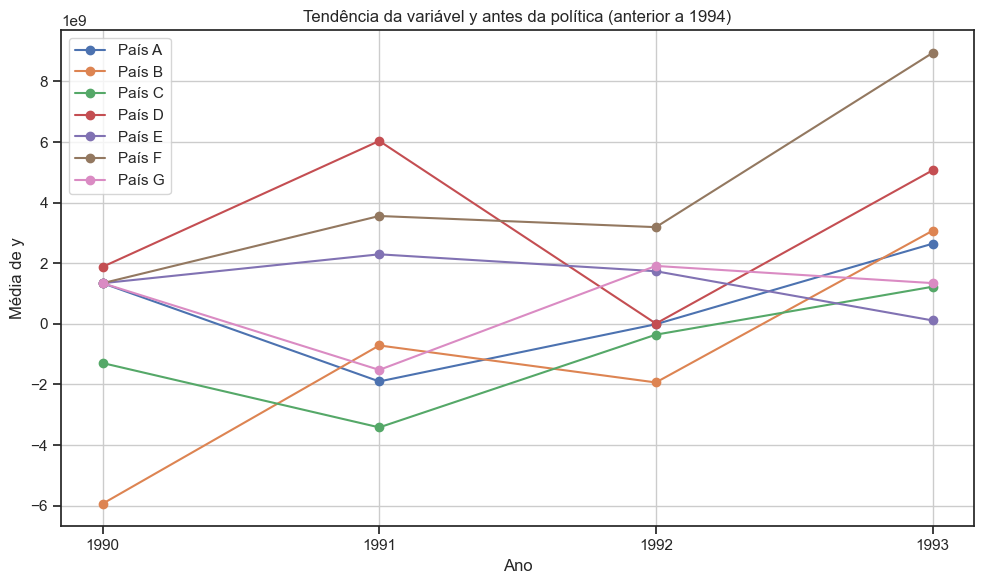

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for country in df_pre['country'].unique():
    df_country = df_pre[df_pre['country'] == country]

    plt.plot(df_country['year'], df_country['y'], marker='o', label=f'País {country}')

    
plt.title('Tendência da variável y antes da política (anterior a 1994)')
plt.xlabel('Ano')
plt.xticks([1990, 1991, 1992, 1993])
plt.ylabel('Média de y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [162]:
df_pre_ctrl = df_pre[df_pre['tratado'] == 0]
df_pre_tratado = df_pre[df_pre['tratado'] == 1]

df_pre_grouped_ctrl = df_pre_ctrl.groupby('year')['y'].mean()
df_pre_grouped_tratado = df_pre_tratado.groupby('year')['y'].mean()

df_pre_grouped_ctrl

year
1990   -1.000316e+09
1991    2.629488e+06
1992   -5.724778e+08
1993    3.002741e+09
Name: y, dtype: float64

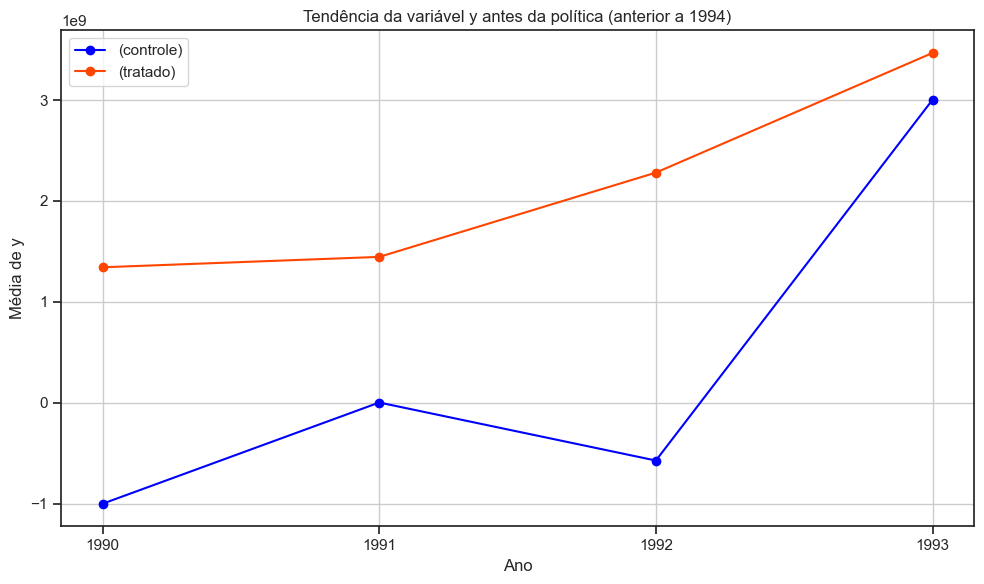

In [163]:
import matplotlib.pyplot as plt



# Cores definidas para tratado e controle
cores = {1: 'blue', 2: 'orangered'}

grouped = [df_pre_grouped_ctrl, df_pre_grouped_tratado]

plt.figure(figsize=(10, 6))

for i in range(len(grouped)):
    
    df_grouped = grouped[i]

    plt.plot(
        df_grouped.index,
        df_grouped.values,
        marker='o',
        label=f'{"(controle)" if i == 0 else "(tratado)"}',
        color=cores[i+1]
    )
    
plt.title('Tendência da variável y antes da política (anterior a 1994)')
plt.xlabel('Ano')
plt.xticks([1990, 1991, 1992, 1993])
plt.ylabel('Média de y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Antes de 1994, as trajetórias de ambos os grupos parecem relativamente paralelas, 
# ainda que em níveis diferentes.

# (5) Consumo de álcool x taxa de mortalidade


As estatísticas relacionadas com o efeito do consumo de álcool são preocupantes,
desde as elevadas taxas de mortalidade por acidentes de trânsito até problemas
de saúde, especialmente entre os jovens adultos. Nesta parte, você irá
replicar um estudo realizado por Carpenter and Dobkin [2009] sobre o efeito
do consumo de álcool nas taxas de mortalidade5. Os dados a serem usados
podem ser obtidos em http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta. A Tabela 1 descreve as colunas desse conjunto de dados.

Variável | Descrição
|---------------|------------------------|
agecell | Idade do indivíduo (adultos entre 19 e 22 anos)
all | Taxa de mortalidade geral
alcohol | Taxa de mortalidade por causas relacionadas ao álcool
homicide | Taxa de mortalidade por homicídios
suicide | Taxa de mortalidade por suicídio
mva | Taxa de mortalidade por acidentes de carro
drugs | Taxa de mortalidade por causas relacionadas a drogas (excluindo álcool)
externalother | Taxa de mortalidade por outras causas externas




Tabela 1: Descrição dos dados usados no artigo Carpenter e Dobkin (2009).


A descontinuidade de regressão é um desenho apropriado para estudar estas
questões, uma vez que os jovens adultos são “naturalmente” selecionados em dois
grupos com base na sua idade: os jovens adultos com menos de 216 anos não estão
legalmente autorizados a beber, enquanto os jovens adultos com mais de 21 anos
são legalmente proibidos de beber. Podemos comparar a taxa de mortalidade
entre esses dois grupos.

(i) Reproduza o gráfico apresentado na Figura 3 do estudo acima mencionado.

In [164]:
import pandas as pd

df = pd.read_stata('AEJfigs.dta')

df.dropna(inplace=True)
df.columns


Index(['agecell', 'all', 'allfitted', 'internal', 'internalfitted', 'external',
       'externalfitted', 'alcohol', 'alcoholfitted', 'homicide',
       'homicidefitted', 'suicide', 'suicidefitted', 'mva', 'mvafitted',
       'drugs', 'drugsfitted', 'externalother', 'externalotherfitted'],
      dtype='object')

In [165]:
# 21 anos é o ponto de corte
threshold = 21

left_side = df[df['agecell'] < threshold].copy()
right_side = df[df['agecell'] >= threshold].copy()

In [166]:
left_side['agecell_norm'] = left_side['agecell'] - threshold
right_side['agecell_norm'] = right_side['agecell'] - threshold

In [167]:
import statsmodels.api as sm

y = ['all', 'internal', 'external']

pred_left = []
pred_right = []
for i in range(3):
    
    # Definir o regression model:
    X_left = left_side[['agecell_norm']]
    X_left = sm.add_constant(X_left)

    X_right = right_side[['agecell_norm']]
    X_right = sm.add_constant(X_right)

    y_left = left_side[y[i]]
    y_right = right_side[y[i]]

    # Fit
    model_left = sm.OLS(y_left, X_left).fit()
    model_right = sm.OLS(y_right, X_right).fit()

    pred_left.append(model_left.predict(X_left))
    pred_right.append(model_right.predict(X_right))

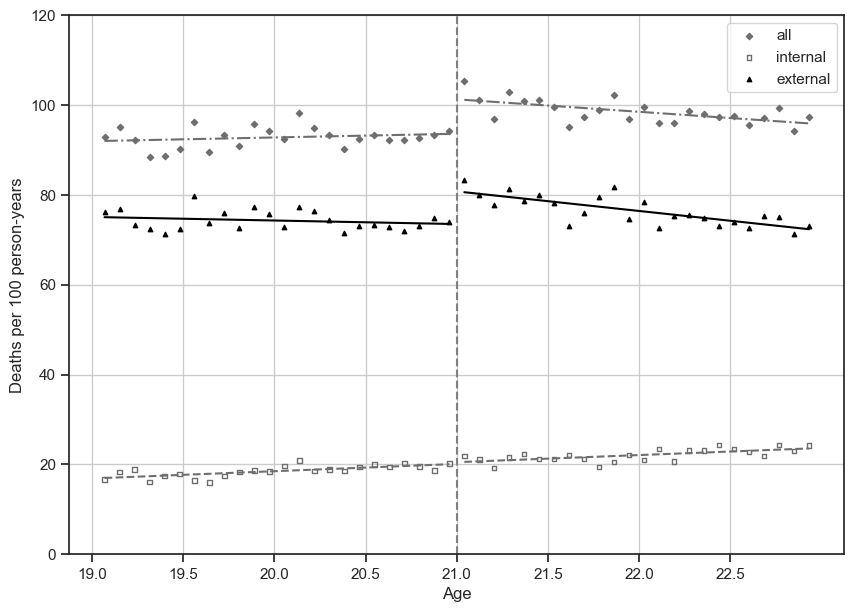

In [168]:
import matplotlib.pyplot as plt
import numpy as np

markers = ['D', 's', '^']
facecolors = ['#6e6e6e', 'none', 'black']
colors = ['#6e6e6e', '#6e6e6e', 'black']
linestyles = ['dashdot','dashed', 'solid']
labels = ['all', 'internal', 'external']

plt.figure(figsize=[10,7])
for i in range(3):
    plt.scatter(left_side['agecell'], left_side[y[i]], marker=markers[i], facecolors=facecolors[i], edgecolors=colors[i], s=10, label=labels[i])
    plt.scatter(right_side['agecell'], right_side[y[i]], marker=markers[i], facecolors=facecolors[i], edgecolors=colors[i], s=10)
    plt.plot(left_side['agecell'], pred_left[i], color=colors[i], linestyle=linestyles[i])
    plt.plot(right_side['agecell'], pred_right[i], color=colors[i], linestyle=linestyles[i])

plt.xticks(np.arange(19,23,0.5))
plt.ylim(0,120)
plt.axvline(threshold, color="gray", linestyle="--")
plt.xlabel('Age')
plt.ylabel('Deaths per 100 person-years')
plt.legend()
plt.grid(True)
plt.show()

(ii) Execute uma regressão descontínua para “todas” as mortes por idade (não
me refiro a todas as variáveis, apenas à variável chamada all). Analise os
resultados. Como você usa esses resultados para estimar a relação entre
consumo de álcool e mortalidade? Nota: O conjunto de dados fornecido
possui menos do que 50 observações. Sendo assim, não espere reproduzir
exatamente os resultados das tabelas do artigo, que usa um conjunto de
dados completo de 1.500 observações. Além disso, você também não tem as
mesmas variáveis.

In [169]:
df_reduced = df[['all', 'agecell']].copy()

threshold = 21

# variável dummy 'treatment'
df_reduced['treatment'] = (df_reduced['agecell'] < threshold).astype(int)

# Create 'score' variable centered at threshold
df_reduced['score'] = df_reduced['agecell'] - threshold

df_reduced.iloc[:5]

,all,agecell,treatment,score
0,92.825401,19.068493,1,-1.931507
1,95.100739,19.150684,1,-1.849316
2,92.144295,19.232876,1,-1.767124
3,88.427757,19.315069,1,-1.684931
4,88.704941,19.397261,1,-1.602739


In [170]:
X = df_reduced[['treatment','score']]
X = sm.add_constant(X)


y = df_reduced['all']

# Fit
model = sm.OLS(y, X).fit()

print(model.summary())

# predictions
pred = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     32.99
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.51e-09
Time:                        15:18:29   Log-Likelihood:                -110.41
No. Observations:                  48   AIC:                             226.8
Df Residuals:                      45   BIC:                             232.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5041      0.805    123.602      0.0

*Sua explicação aqui:*

Variáveis no modelo:

- all: número de mortes por alcoolismo (variável dependente).
- treatment: indicador se a idade está acima de 21 anos (1 se < 21, 0 caso contrário).
- score: distância da idade em relação ao ponto de corte (provavelmente agecell - 21).

pela variável treatment, nota-se que há um aumento estatisticamente significativo de ~7,66 mortes ($\beta_1$) ao cruzar o ponto de corte (idade > 21). Percebe-se o seu valor_p bem menor que 0.05.

---

(iii) Produza o gráfico todas as variáveis por idade e adicione as linhas de regressão
definidas pelo resultado da regressão (não há problema se as linhas
se estenderem por toda a figura. O gráfico que você deve produzir aqui
deve ser semelhante ao apresentado na Figura 1.

C:\Users\parai\AppData\Local\Temp\ipykernel_8496\3118975915.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


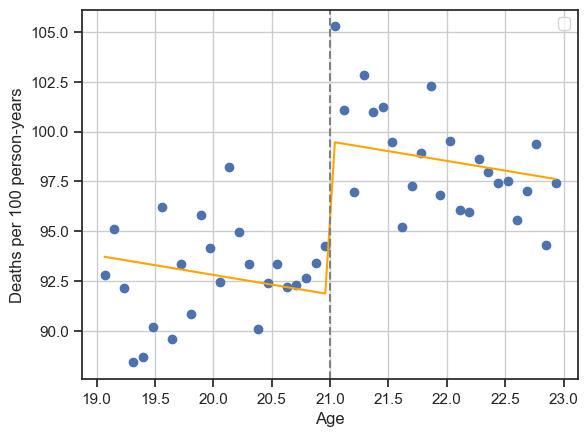

In [172]:

plt.plot(df_reduced['agecell'], pred, color='orange') # plotamos a linha de regressão retornada pelo modelo em 'pred' 
plt.scatter(df_reduced['agecell'], df_reduced['all'])
plt.axvline(threshold, color="gray", linestyle="--")
plt.xlabel('Age')
plt.ylabel('Deaths per 100 person-years')
plt.legend()
plt.grid(True)
plt.show()